# Metabolomics analysis with GNPS

## Setup

In [1]:
import calour as ca

/Users/amnon/miniconda3/envs/calour/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [3]:
ca.set_log_level('DEBUG')

## Load the metabolomics bucket table
This is a bucket table exported from GNPS.

We also import the GNPS output file for the gnps data for each metabolite

In [4]:
dat=ca.io.read_gnps_ms(data_file='/Users/amnon/Projects/tal-metabolites/bucket-gnps.tsv',
                       sample_metadata_file='/Users/amnon/Projects/tal-metabolites/map.txt',
                       gnps_file='/Users/amnon/Projects/tal-metabolites/gnps-output.tsv',
                       normalize=None)

2018-02-21 14:24:27 DEBUG Reading GnpsMS data (GnpsMS bucket table /Users/amnon/Projects/tal-metabolites/bucket-gnps.tsv, map file /Users/amnon/Projects/tal-metabolites/map.txt)
2018-02-21 14:24:27 DEBUG Reading experiment (/Users/amnon/Projects/tal-metabolites/bucket-gnps.tsv, /Users/amnon/Projects/tal-metabolites/map.txt, None)
2018-02-21 14:24:27 DEBUG loading OpenMS bucket table /Users/amnon/Projects/tal-metabolites/bucket-gnps.tsv
2018-02-21 14:24:27 INFO loaded 511 samples, 71 features
2018-02-21 14:24:27 DEBUG transposing table
2018-02-21 14:24:27 DEBUG caculating data md5
2018-02-21 14:24:27 DEBUG data md5 is: fe18b6ca770b17be06487e5799ed0f12
2018-02-21 14:24:27 DEBUG getting file md5 for file /Users/amnon/Projects/tal-metabolites/map.txt
2018-02-21 14:24:27 DEBUG md5 of /Users/amnon/Projects/tal-metabolites/map.txt: 371f136e7d6fb91ba11724300792fb7a
2018-02-21 14:24:27 DEBUG getting file md5 for file None
2018-02-21 14:24:27 DEBUG Adding gnps terms as "gnps" column in feature m

In [5]:
print(dat)

MS1Experiment bucket-gnps.tsv with 71 samples, 511 features


## Preprocessing

### Remove low frequency metabolites (features)

In [6]:
datc=dat.cluster_features()

2018-02-21 14:24:28 DEBUG Run func cluster_features
2018-02-21 14:24:28 DEBUG Run func filter_abundance
2018-02-21 14:24:28 DEBUG Run func filter_by_data
2018-02-21 14:24:28 DEBUG filter_by_data using predicate function 'sum_abundance'
2018-02-21 14:24:28 INFO After filtering, 511 remaining
2018-02-21 14:24:28 DEBUG Current object: MS1Experiment bucket-gnps.tsv with 71 samples, 511 features
2018-02-21 14:24:28 DEBUG Current object: MS1Experiment bucket-gnps.tsv with 71 samples, 511 features
2018-02-21 14:24:28 DEBUG Run func cluster_data
2018-02-21 14:24:28 DEBUG clustering data on axis 1
2018-02-21 14:24:28 DEBUG tansforming data using <function transform at 0x1a101ae9d8>
2018-02-21 14:24:28 DEBUG Run func transform
2018-02-21 14:24:28 DEBUG Run func log_n
2018-02-21 14:24:28 DEBUG log_n transforming the data, min. threshold=1.000000
2018-02-21 14:24:28 DEBUG Current object: MS1Experiment bucket-gnps.tsv with 71 samples, 511 features
2018-02-21 14:24:28 DEBUG Run func scale
2018-02-21

### sort the samples by relevant fields for the plot

In [7]:
datc=datc.sort_samples('time_days')

2018-02-21 14:24:28 DEBUG Run func sort_samples
2018-02-21 14:24:28 DEBUG Run func sort_by_metadata
2018-02-21 14:24:28 DEBUG sorting samples by field time_days
2018-02-21 14:24:28 DEBUG Current object: MS1Experiment bucket-gnps.tsv with 71 samples, 511 features
2018-02-21 14:24:28 DEBUG Current object: MS1Experiment bucket-gnps.tsv with 71 samples, 511 features


In [8]:
datc=datc.sort_samples('batch')

2018-02-21 14:24:29 DEBUG Run func sort_samples
2018-02-21 14:24:29 DEBUG Run func sort_by_metadata
2018-02-21 14:24:29 DEBUG sorting samples by field batch
2018-02-21 14:24:29 DEBUG Current object: MS1Experiment bucket-gnps.tsv with 71 samples, 511 features
2018-02-21 14:24:29 DEBUG Current object: MS1Experiment bucket-gnps.tsv with 71 samples, 511 features


In [9]:
datc=datc.sort_samples('group')

2018-02-21 14:24:29 DEBUG Run func sort_samples
2018-02-21 14:24:29 DEBUG Run func sort_by_metadata
2018-02-21 14:24:29 DEBUG sorting samples by field group
2018-02-21 14:24:29 DEBUG Current object: MS1Experiment bucket-gnps.tsv with 71 samples, 511 features
2018-02-21 14:24:29 DEBUG Current object: MS1Experiment bucket-gnps.tsv with 71 samples, 511 features


## Plot the data
By default, the y-axis (metabolites) shows the GNPS ID of the metabolite

<IPython.core.display.Javascript object>


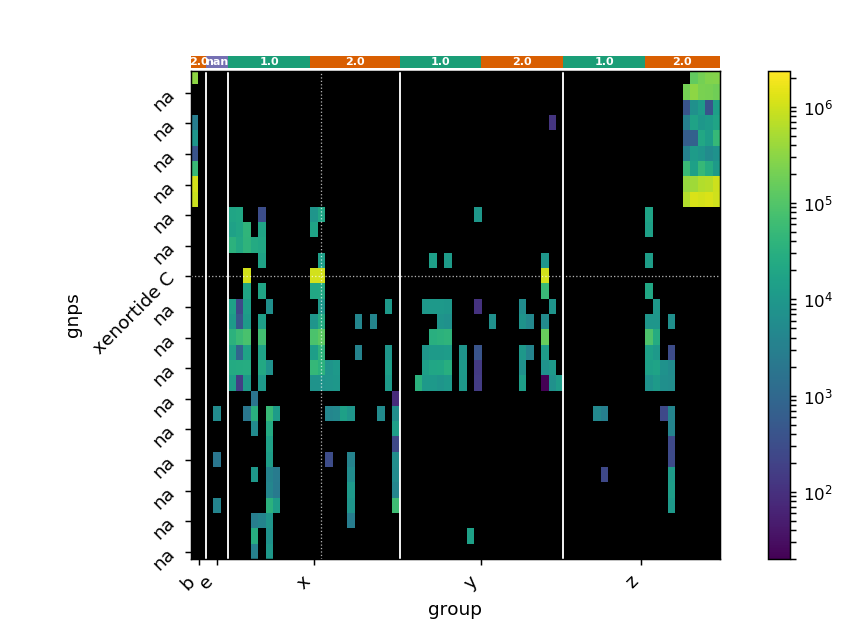

2018-02-21 14:47:32 DEBUG get_config_value for key class_name
2018-02-21 14:47:32 DEBUG Using calour config file /Users/amnon/git/calour/calour/calour.config.amnon from CALOUR_CONFIG_FILE variable
2018-02-21 14:47:32 DEBUG found value GNPS for key class_name
2018-02-21 14:47:32 DEBUG get_config_value for key module_name
2018-02-21 14:47:32 DEBUG Using calour config file /Users/amnon/git/calour/calour/calour.config.amnon from CALOUR_CONFIG_FILE variable
2018-02-21 14:47:32 DEBUG found value gnpscalour for key module_name
2018-02-21 14:47:32 DEBUG Plot heatmap


In [37]:
datc.plot(sample_field='group',gui='jupyter',barx_fields=['batch'])

In [ ]:
datc.plot(sample_field='group',gui='qt5',barx_fields=['batch'])

In [ ]:
dd=datc.diff_abundance('batch','1','2')

In [ ]:
dd.plot(sample_field='group',gui='qt5',barx_fields=['batch'])

In [ ]:
dd=datc.diff_abundance('group','x','z')

In [ ]:
dd.plot_sort('group',gui='qt5')

In [ ]:
tt=datc.filter_samples('time_days',[16,21,25,30])

In [ ]:
dd=tt.diff_abundance('group','x','z')

In [ ]:
zz=datc.filter_ids(dd.feature_metadata.index)

In [ ]:
zz.plot_sort('group',gui='qt5')

In [ ]:
type(dat.feature_metadata.id)

In [ ]:
dat.feature_metadata.id.index

In [ ]:
dat.feature_metadata.id.iloc[100]

In [17]:
xx=ca.database._get_database_class('dbbact')

2018-02-21 14:28:53 DEBUG get_config_value for key class_name
2018-02-21 14:28:53 DEBUG Using calour config file /Users/amnon/git/calour/calour/calour.config.amnon from CALOUR_CONFIG_FILE variable
2018-02-21 14:28:53 DEBUG found value DBBact for key class_name
2018-02-21 14:28:53 DEBUG get_config_value for key module_name
2018-02-21 14:28:53 DEBUG Using calour config file /Users/amnon/git/calour/calour/calour.config.amnon from CALOUR_CONFIG_FILE variable
2018-02-21 14:28:53 DEBUG found value dbbact_calour.dbbact for key module_name
2018-02-21 14:28:53 DEBUG get_config_value for key username
2018-02-21 14:28:53 DEBUG Using calour config file /Users/amnon/git/calour/calour/calour.config.amnon from CALOUR_CONFIG_FILE variable
2018-02-21 14:28:53 DEBUG found value amnon for key username
2018-02-21 14:28:53 DEBUG get_config_value for key password
2018-02-21 14:28:53 DEBUG Using calour config file /Users/amnon/git/calour/calour/calour.config.amnon from CALOUR_CONFIG_FILE variable
2018-02-21 

In [18]:
xx.get_annotation_website(1)

2018-02-21 14:29:31 DEBUG Generic function for get_annotation_website


In [19]:
yy=ca.database._get_database_class('gnps',dat)

2018-02-21 14:30:13 DEBUG get_config_value for key class_name
2018-02-21 14:30:13 DEBUG Using calour config file /Users/amnon/git/calour/calour/calour.config.amnon from CALOUR_CONFIG_FILE variable
2018-02-21 14:30:13 DEBUG found value GNPS for key class_name
2018-02-21 14:30:13 DEBUG get_config_value for key module_name
2018-02-21 14:30:13 DEBUG Using calour config file /Users/amnon/git/calour/calour/calour.config.amnon from CALOUR_CONFIG_FILE variable
2018-02-21 14:30:13 DEBUG found value gnpscalour for key module_name


In [21]:
yy.get_annotation_website({'a':'b'})

2018-02-21 14:30:29 WARNING GNPS info does not contain gnps_link. It only contains: ['a']
